In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Generate synthetic data for 100 observations
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Data_Storage_Utilization': np.random.uniform(60, 90, n),  # Utilization in %
    'Data_Access_Latency': np.random.uniform(10, 30, n),       # Latency in ms
    'Data_Recovery_Time': np.random.uniform(0.5, 2, n),        # RTO in hours
    'Storage_Cost': np.random.normal(50000, 10000, n),         # Cost in $
    'Access_Cost': np.random.normal(20000, 5000, n),           # Cost in $
    'Recovery_Cost': np.random.normal(15000, 3000, n),          # Cost in $
    'Maintenance_Cost': np.random.normal(10000, 2000, n),      # Maintenance cost in $
    'Cloud_Storage_Cost': np.random.normal(60000, 15000, n),   # Cloud storage cost in $
    'InHouse_Storage_Cost': np.random.normal(45000, 8000, n),  # In-house storage cost in $
    'Backup_Cost': np.random.normal(10000, 3000, n),           # Backup cost in $
    'IT_Spending': np.random.normal(100000, 20000, n),
    'Idle_Resources': np.random.randint(1, 10, n)
})

# Add 'Users_Count' to the data (example with random user count)
data['Users_Count'] = np.random.randint(50, 2000, size=100)

# Calculate Total Storage Spending (Cloud + In-House + Other Costs)
data['Total_Storage_Spending'] = (data['Cloud_Storage_Cost'] + data['InHouse_Storage_Cost'] +
                                   data['Storage_Cost'] + data['Backup_Cost'])


# Calculate Cost per User
data['Total_Cost_per_User'] = data['Total_Storage_Spending'] / data['Users_Count']

# Display the first few rows of the data to ensure correct calculation
data.head()

,Data_Storage_Utilization,Data_Access_Latency,Data_Recovery_Time,Storage_Cost,Access_Cost,Recovery_Cost,Maintenance_Cost,Cloud_Storage_Cost,InHouse_Storage_Cost,Backup_Cost,IT_Spending,Idle_Resources,Users_Count,Total_Storage_Spending,Total_Cost_per_User
0,71.236204,10.628584,1.463047,50455.718399,20379.022791,14191.779497,9867.840403,57629.881521,48266.022046,6987.577700,71039.721992,5,1379,163339.199666,118.447570
1,88.521429,22.728208,0.626210,43483.996524,16614.191442,17152.626767,7577.967600,53596.783951,31379.331166,7696.607305,56023.880868,8,1870,136156.718946,72.811080
2,81.959818,16.287120,0.742443,71439.440893,24875.598667,19507.071156,8696.327784,44818.434371,53233.245099,9895.945338,108800.289001,4,1258,179387.065701,142.597032
3,77.959755,20.171414,1.847831,56339.190223,19264.713092,15222.284341,10094.797343,35177.149922,48780.779859,10702.644198,89958.915513,5,1112,150999.764202,135.791155
4,64.680559,28.151329,1.409644,29748.574133,15872.514016,19885.846637,8279.173269,72347.558759,47048.237875,14651.501478,79575.343657,4,1296,163795.872246,126.385704


In [23]:
# Calculate cost effects
data['Utilization_Cost_Effect'] = data['Data_Storage_Utilization'] * data['Storage_Cost'] * 0.01
data['Latency_Cost_Effect'] = (30 - data['Data_Access_Latency']) * data['Access_Cost'] * 0.01
data['Recovery_Cost_Effect'] = (2 - data['Data_Recovery_Time']) * data['Recovery_Cost'] * 0.5

# Generate synthetic data for Cloud_Cost
data['Cloud_Cost'] = np.random.normal(40000, 8000, len(data))  # Cloud cost in $
# Generate synthetic data for InHouse_Cost
data['InHouse_Cost'] = np.random.normal(35000, 7000, len(data))  # In-house cost in $

data['Cloud_vs_InHouse_Ratio'] = data['Cloud_Cost'] / (data['Cloud_Cost'] + data['InHouse_Cost'])
data['Cloud_vs_InHouse_Storage_Ratio'] = data['Cloud_Storage_Cost'] / (data['Cloud_Storage_Cost'] + data['InHouse_Storage_Cost'])
data['Backup_vs_Total_Storage_Ratio'] = data['Backup_Cost'] / data['Total_Storage_Spending']

# Annual Growth Rate
data['Annual_Growth_Rate'] = data['IT_Spending'].pct_change().fillna(0)

In [25]:
# Calculate Cloud vs On-Premises Storage Cost Ratio
# Ensuring no division by zero by adding a small constant
data['Cloud_vs_InHouse_Storage_Ratio'] = data['Cloud_Storage_Cost'] / (data['Cloud_Storage_Cost'] + data['InHouse_Storage_Cost'] + 1e-9)

# Calculate Total Storage Cost per User
# Avoid division by zero by handling 'Users_Count' appropriately
data['Total_Storage_Cost_per_User'] = data['Total_Storage_Spending'] / data['Users_Count'].replace(0, np.nan)

# Calculate Annual Growth Rate in Storage Spending
# Use a more descriptive column name and handle NaN values
data['Storage_Spending_Growth_Rate'] = data['Total_Storage_Spending'].pct_change().fillna(0)


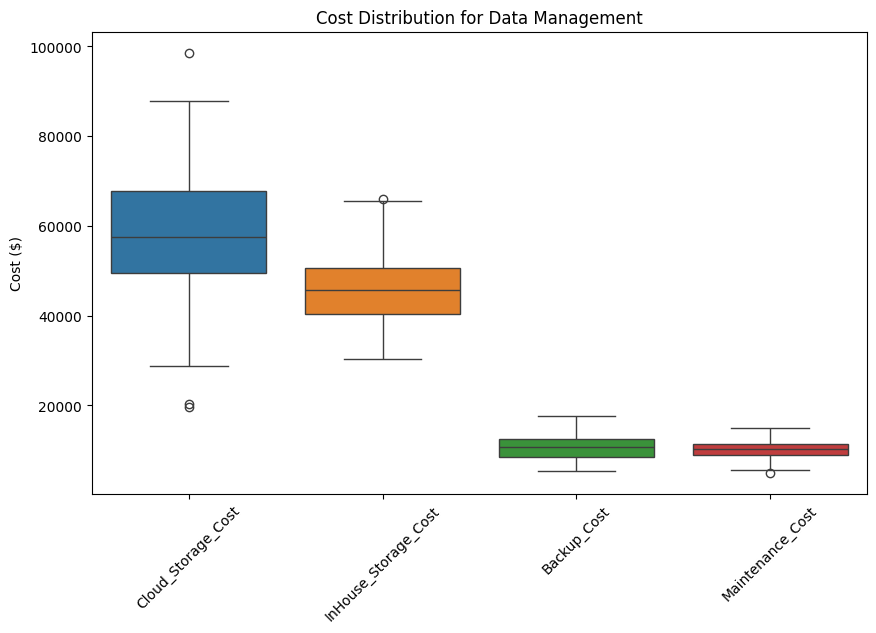

In [26]:
# Select relevant columns for data management costs
cost_columns = ['Cloud_Storage_Cost', 'InHouse_Storage_Cost', 'Backup_Cost', 'Maintenance_Cost']

# Ensure the columns exist in the dataset
selected_data = data[cost_columns]

# Plot the cost distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data)
plt.title('Cost Distribution for Data Management')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()

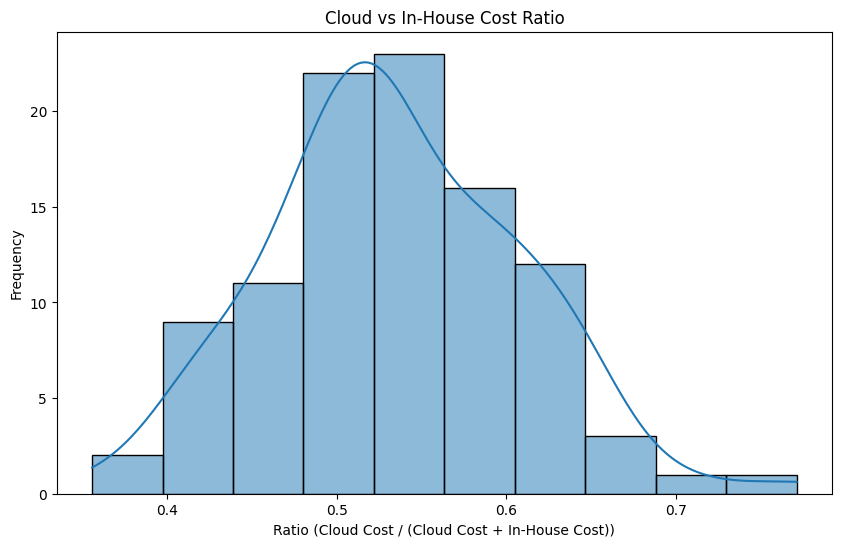

In [27]:
# Plot Cloud vs In-House Cost Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['Cloud_vs_InHouse_Ratio'], kde=True)
plt.title('Cloud vs In-House Cost Ratio')
plt.xlabel('Ratio (Cloud Cost / (Cloud Cost + In-House Cost))')
plt.ylabel('Frequency')
plt.show()

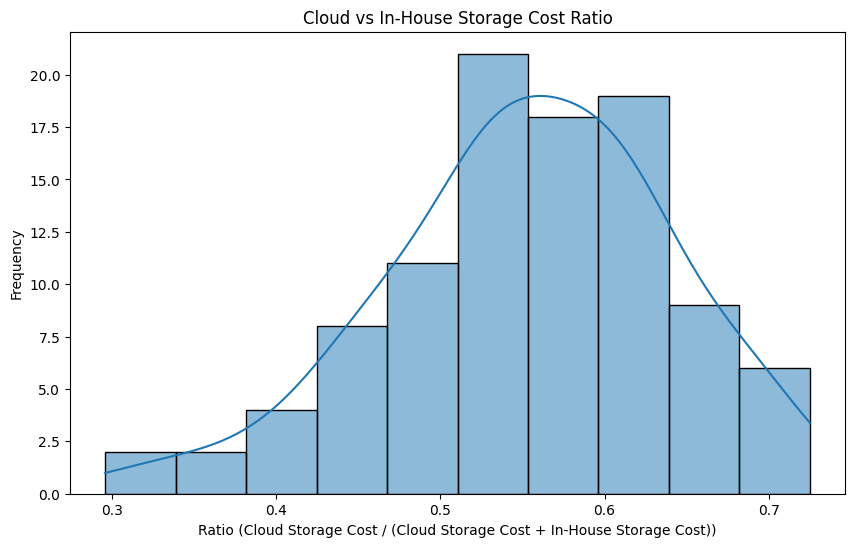

In [28]:
# Plot Cloud Storage Cost vs In-House Storage Cost Ratio
data['Cloud_vs_InHouse_Storage_Ratio'] = data['Cloud_Storage_Cost'] / (data['Cloud_Storage_Cost'] + data['InHouse_Storage_Cost'])
plt.figure(figsize=(10, 6))
sns.histplot(data['Cloud_vs_InHouse_Storage_Ratio'], kde=True)
plt.title('Cloud vs In-House Storage Cost Ratio')
plt.xlabel('Ratio (Cloud Storage Cost / (Cloud Storage Cost + In-House Storage Cost))')
plt.ylabel('Frequency')
plt.show()

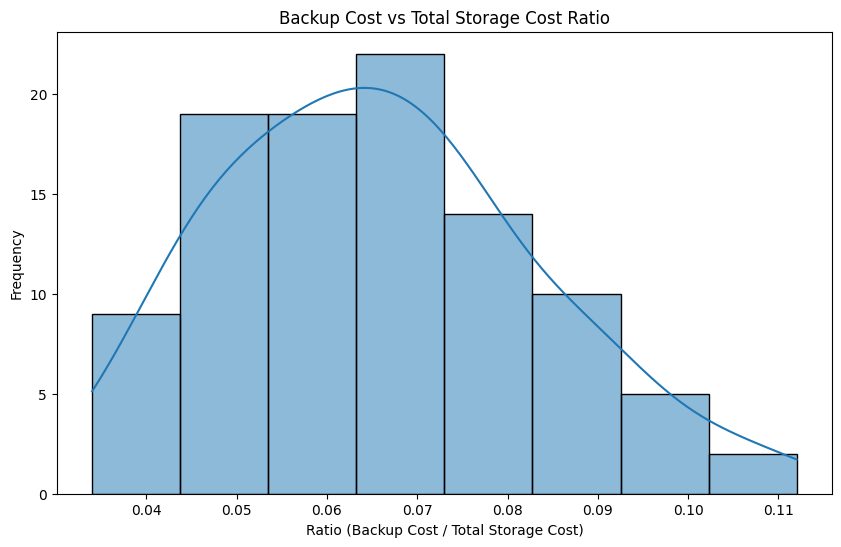

In [29]:
# Plot Backup Cost vs Total Storage Cost Ratio
data['Backup_vs_Total_Storage_Ratio'] = data['Backup_Cost'] / data['Total_Storage_Spending']
plt.figure(figsize=(10, 6))
sns.histplot(data['Backup_vs_Total_Storage_Ratio'], kde=True)
plt.title('Backup Cost vs Total Storage Cost Ratio')
plt.xlabel('Ratio (Backup Cost / Total Storage Cost)')
plt.ylabel('Frequency')
plt.show()

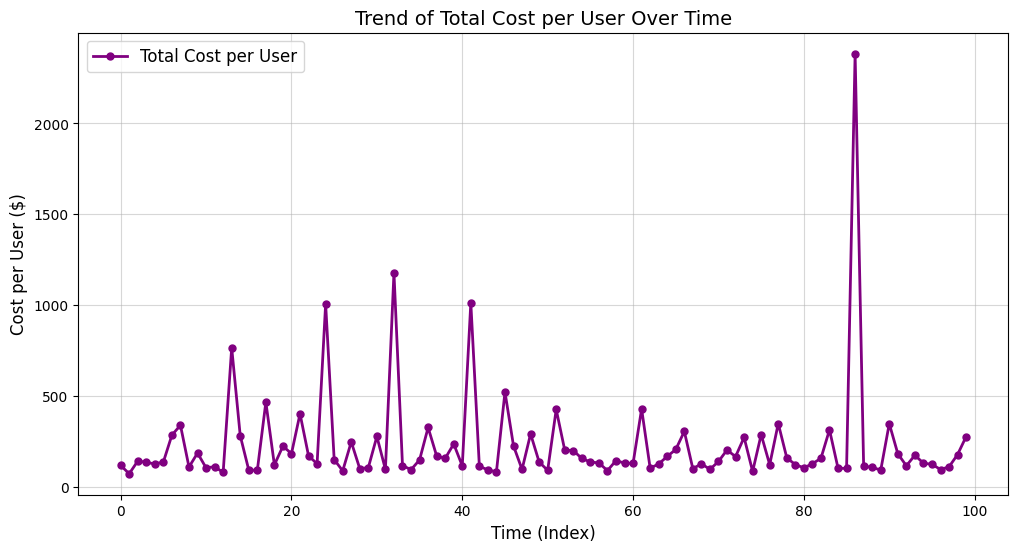

In [30]:
plt.figure(figsize=(12, 6))

# Plotting Total Cost per User
plt.plot(data.index, data['Total_Cost_per_User'], label='Total Cost per User', color='purple', linewidth=2, marker='o', markersize=5)

# Adding title and labels
plt.title('Trend of Total Cost per User Over Time', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Cost per User ($)', fontsize=12)

# Improving axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend(fontsize=12, loc='upper left')

# Adding grid for better visualization
plt.grid(alpha=0.5)

# Displaying the plot
plt.show()


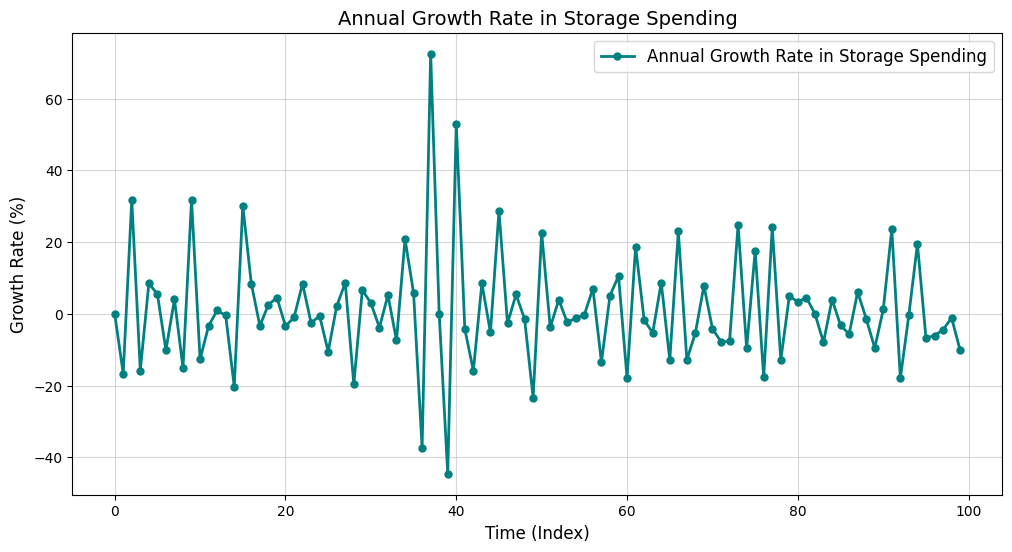

In [34]:
plt.figure(figsize=(12, 6))

# Plotting Annual Growth Rate for Storage Spending
plt.plot(data.index, data['Storage_Spending_Growth_Rate'] * 100, marker='o', markersize=5, color='teal', linewidth=2, label='Annual Growth Rate in Storage Spending')

# Adding title and labels
plt.title('Annual Growth Rate in Storage Spending', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)

# Adding grid for readability
plt.grid(alpha=0.5)

# Enhancing axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding a legend
plt.legend(fontsize=12, loc='best')

# Displaying the plot
plt.show()


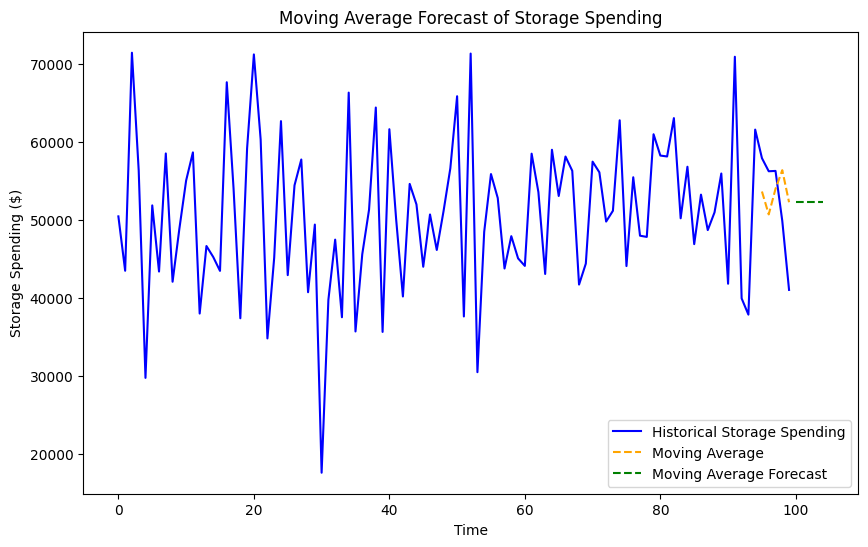

In [36]:
# Generate moving average for Storage Spending
window_size = 5
data['Storage_Spending_MA'] = data['Storage_Cost'].rolling(window=window_size).mean()

# Forecast next 5 periods
forecast_periods = 5
last_moving_average = data['Storage_Spending_MA'].iloc[-1]
forecast_values = np.repeat(last_moving_average, forecast_periods)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Storage_Cost'], label='Historical Storage Spending', color='blue')
plt.plot(data.index[-forecast_periods:], data['Storage_Spending_MA'][-forecast_periods:], label='Moving Average', linestyle='--', color='orange')
plt.plot(range(len(data), len(data) + forecast_periods), forecast_values, label='Moving Average Forecast', linestyle='--', color='green')
plt.legend()
plt.title(f'Moving Average Forecast of Storage Spending')
plt.xlabel('Time')
plt.ylabel('Storage Spending ($)')
plt.show()


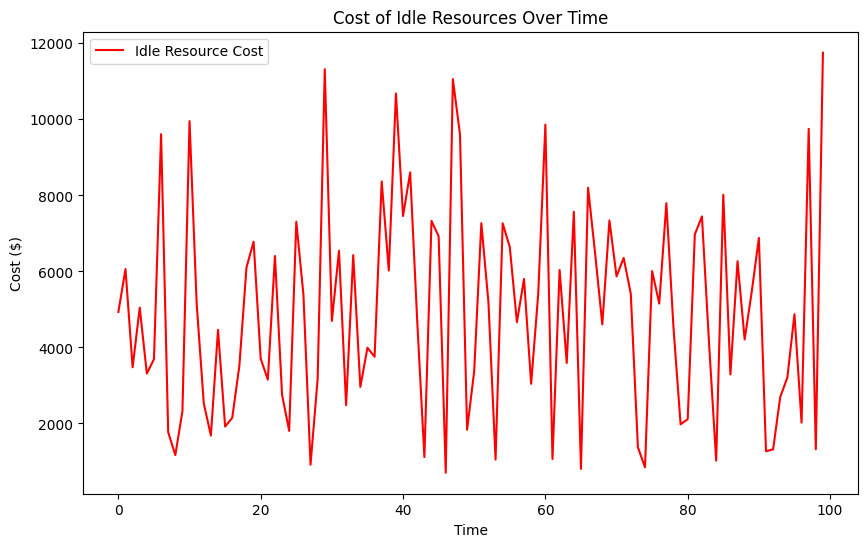

In [33]:
data['Idle_Resource_Cost'] = data['Idle_Resources'] * data['Maintenance_Cost'] * 0.1  # Assumed cost factor

plt.figure(figsize=(10, 6))
plt.plot(data['Idle_Resource_Cost'], label='Idle Resource Cost', color='red')
plt.title('Cost of Idle Resources Over Time')
plt.xlabel('Time')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()